In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\kmm23\\Downloads\\student_performance_prediction.csv")

# Loading and exploring data.

In [3]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [4]:
df.drop(columns=["Student ID"],inplace=True)

In [5]:
df.shape

(40000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Study Hours per Week                         38005 non-null  float64
 1   Attendance Rate                              38008 non-null  float64
 2   Previous Grades                              38006 non-null  float64
 3   Participation in Extracurricular Activities  38000 non-null  object 
 4   Parent Education Level                       38000 non-null  object 
 5   Passed                                       38000 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.8+ MB


In [7]:
df.describe(include="object")

,Participation in Extracurricular Activities,Parent Education Level,Passed
count,38000,38000,38000
unique,2,5,2
top,No,Bachelor,Yes
freq,19028,7685,19011


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [10]:
df.columns

Index(['Study Hours per Week', 'Attendance Rate', 'Previous Grades',
       'Participation in Extracurricular Activities', 'Parent Education Level',
       'Passed'],
      dtype='object')

In [11]:
df.rename(columns={"Study Hours per Week":"study_hours"},inplace=True)

In [12]:
df.rename(columns={"Attendance Rate":"Attendance_Rate"},inplace=True)

In [13]:
df.rename(columns={"Previous Grades":"Previous_Grades"},inplace=True)

In [14]:
df.rename(columns={"Participation in Extracurricular Activities":"Participation_in_Extracurricular_Activities"},inplace=True)

In [15]:
df.rename(columns={"Parent Education Level":"Parent_Education_Level"},inplace=True)

# Filling null values

In [16]:
df.study_hours.unique()

array([ 12.5,   9.3,  13.2,  17.6,   8.8,  17.9,  13.8,   7.7,  12.7,
        11.2,   0.4,   1.4,   7.2,   4.9,  11.6,   5.5,   2.9,  17.3,
         8.9,  10.3,   7.3,  10.6,   4.2,  11.9,   7. ,   8.5,  19.3,
         9.9,   4.7,  14.1,   3.9,  11. ,   0.2,   3.4,   nan,  10.9,
         9.4,   2.6,   6.4,  15.3,  11.7,   1.2,   8.1,   6.6,  13.1,
        15.2,  14.7,   5.8,  14.9,   7.6,   9.1,   4.5,   4. ,  16.8,
         9.6,  15. ,  11.8,   6.8,  17.7,   9.8,  17.8,  -3.1,  10.4,
        10.5,   0.1,  17.4,   7.4,   6. ,   7.5,  14.6,  12.6,  14.8,
         6.5,   8.4,   8. ,   2.7,  11.5,  11.3,  10. ,   7.9,   9.2,
        12. ,  19.4,  22.3,   9. ,  15.7,  14. ,  17. ,   3. ,  12.9,
        21. ,   2.2,  12.4,   5.4,   6.1,   3.8,  11.1,  16.5,   2. ,
        13.9,   5.1,  15.8,   5.9,  12.1,  19.5,   6.2,   5.6,  11.4,
        10.1,   8.7,   5.7,   4.6,  13.6,   2.4,   7.8,  14.3,  10.8,
        12.8,  15.4,   3.1,   5.3,  29.3,  13.3,  21.6,   0.7,  13.4,
         1.9,  10.2,

In [17]:
df.study_hours.value_counts()

study_hours
 10.1    339
 10.7    333
 11.2    318
 10.2    317
 10.4    315
        ... 
-9.2       1
-8.2       1
-9.6       1
-6.9       1
 26.5      1
Name: count, Length: 355, dtype: int64

In [18]:
df.study_hours.fillna(df.study_hours.median(),inplace=True)

In [19]:
df.study_hours.isna().sum()

0

In [20]:
df.head()

,study_hours,Attendance_Rate,Previous_Grades,Participation_in_Extracurricular_Activities,Parent_Education_Level,Passed
0,12.5,NaN,75.0,Yes,Master,Yes
1,9.3,95.3,60.6,No,High School,No
2,13.2,NaN,64.0,No,Associate,No
3,17.6,76.8,62.4,Yes,Bachelor,No
4,8.8,89.3,72.7,No,Master,No


In [21]:
df.Attendance_Rate.unique()

array([  nan,  95.3,  76.8, ..., 136.5, 128.6,  12.2])

In [22]:
df.Attendance_Rate.value_counts()

Attendance_Rate
150.0    100
77.8      98
80.2      96
75.6      95
67.2      90
        ... 
8.7        1
134.4      1
16.7       1
16.6       1
12.2       1
Name: count, Length: 1235, dtype: int64

In [23]:
df.Attendance_Rate.fillna(df.Attendance_Rate.median(),inplace=True)

In [24]:
df.Attendance_Rate.isna().sum()

0

In [25]:
df.Previous_Grades.unique()

array([ 75. ,  60.6,  64. ,  62.4,  72.7,  69.3,  93.6,  59.2,  91.9,
        37.8,  72.3,  41.2,  49.6,  50.4,  49.2,  55.9,  98. ,  51.8,
        40.8,  72.4,  68.6,  98.2,  64.4,  30.7,  58.6,  58.3,  46.5,
        56.6,  62.8,  64.1,  44.3,  74.1,  89.5,  69.2,  81.6,  67.7,
        49.3,  69.1,  57.5,  48.4,  63.8,  77.3,  59.9,  94.1,  79.3,
        56.8,  56.3,  97.2,  60. ,  70.5,  71.3,  39.1,  39.3,   nan,
        65.2,  42.3,  60.1,  68.2,  34.1,  65.8,  66.6,  58. ,  48.5,
        59.4,  93.9,  63.2,  71.4,  70.8,  71.7,  74. ,  43.1,  67.8,
        55.7,  63.4,  64.7,  67.6,  39.8,  68.9,  74.8,  68.7,  54.1,
        52.1,  77. ,  84.6,  76.5,  26.9,  54.8, 200. ,  49.1,  91.5,
        45.5,  61.8,  52. ,  71.2,  47.3,  63.3,  58.2,  51. ,  49.5,
        81.5,  68. ,  55.6,  87.3,  61.4,  73. ,  86.6,  68.1,  82.4,
        73.1,  56.7,  65. ,  56.4,  48.8,  85.4,  85. ,  44.9,  56.2,
        40. ,  82.2,  29. ,  76.9,  66.9,  80.8,  74.4,  74.2,  78.5,
        61.6,  61. ,

In [26]:
df.Previous_Grades.fillna(df.Previous_Grades.median(),inplace=True)

In [27]:
df.Previous_Grades.isna().sum()

0

In [28]:
df.Participation_in_Extracurricular_Activities.unique()

array(['Yes', 'No', nan], dtype=object)

<Axes: xlabel='Participation_in_Extracurricular_Activities'>

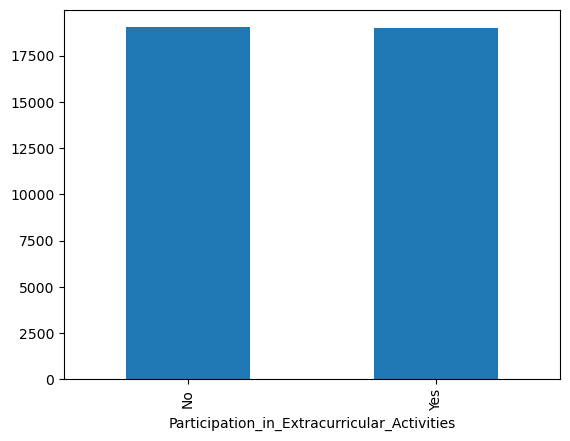

In [29]:
df.Participation_in_Extracurricular_Activities.value_counts().plot(kind="bar")

In [30]:
df.Participation_in_Extracurricular_Activities.value_counts()/df.shape[0]

Participation_in_Extracurricular_Activities
No     0.4757
Yes    0.4743
Name: count, dtype: float64

In [31]:
df=df.dropna(axis=0)

In [32]:
df.Participation_in_Extracurricular_Activities.isna().sum()

0

In [33]:
df.Parent_Education_Level.unique()

array(['Master', 'High School', 'Associate', 'Bachelor', 'Doctorate'],
      dtype=object)

<Axes: xlabel='Parent_Education_Level'>

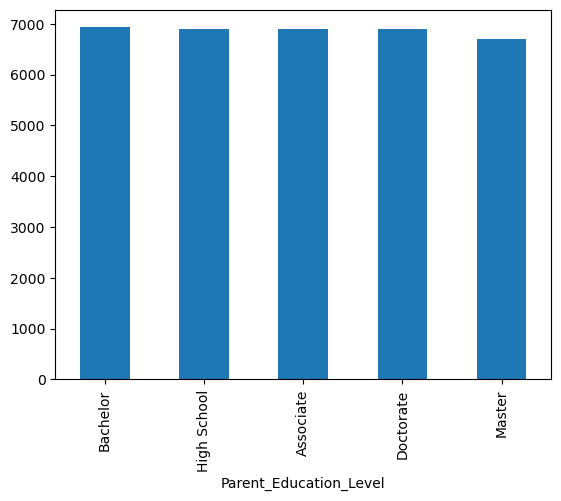

In [34]:
df.Parent_Education_Level.value_counts().plot(kind="bar")

In [35]:
df.Parent_Education_Level.isna().sum()

0

In [36]:
(2000/40000)

0.05

In [37]:
df["Parent_Education_Level"]=df["Parent_Education_Level"].fillna(df["Parent_Education_Level"].mode())

In [38]:
df=df.dropna(axis=0)

In [39]:
df.Parent_Education_Level.isna().sum()

0

In [40]:
df.isna().sum()

study_hours                                    0
Attendance_Rate                                0
Previous_Grades                                0
Participation_in_Extracurricular_Activities    0
Parent_Education_Level                         0
Passed                                         0
dtype: int64

# Detecting and removing the outliers from every column.

# 1..

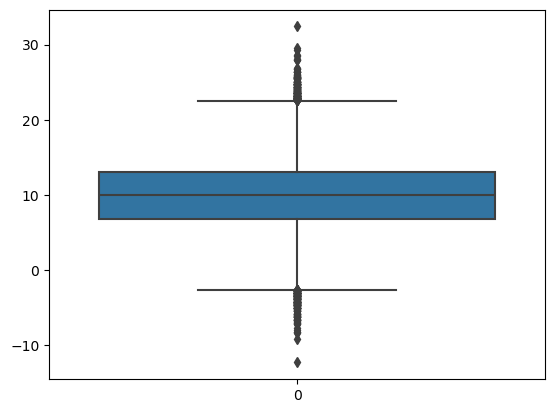

In [41]:
sns.boxplot(df.study_hours)
plt.show()

In [42]:
q1=df["study_hours"].quantile(0.25)
q3=df["study_hours"].quantile(0.75)

IQR=q3-q1

In [43]:
lb=q1-1.5*IQR
ub=q3+1.5*IQR
lb,ub

(-2.6499999999999995, 22.549999999999997)

In [44]:
df.loc[(df["study_hours"] > ub) | (df["study_hours"] < lb)]


,study_hours,Attendance_Rate,Previous_Grades,Participation_in_Extracurricular_Activities,Parent_Education_Level,Passed
74,-3.1,37.3,43.1,No,Master,Yes
209,29.3,75.3,55.1,Yes,Bachelor,Yes
262,-6.2,98.7,26.2,Yes,High School,Yes
478,25.4,84.5,53.0,No,High School,Yes
646,-3.5,118.0,92.6,No,Doctorate,No
...,...,...,...,...,...,...
39616,-7.2,97.8,46.3,Yes,High School,No
39624,23.0,96.9,43.6,Yes,High School,No
39660,22.9,80.1,80.7,No,Master,Yes
39838,26.5,75.3,69.3,Yes,Associate,Yes


In [45]:
df1=df.loc[(df["study_hours"] < ub) & (df["study_hours"] > lb)]
print("before removing outliers:",len(df))
print("after removing outliers:",len(df1))
print("outliers:",len(df)-len(df1))

before removing outliers: 34306
after removing outliers: 33913
outliers: 393


In [46]:
df1=df.copy()
df1.loc[(df1["study_hours"]>ub), "study_hours"]=ub
df1.loc[(df1["study_hours"]<lb), "study_hours"]=lb

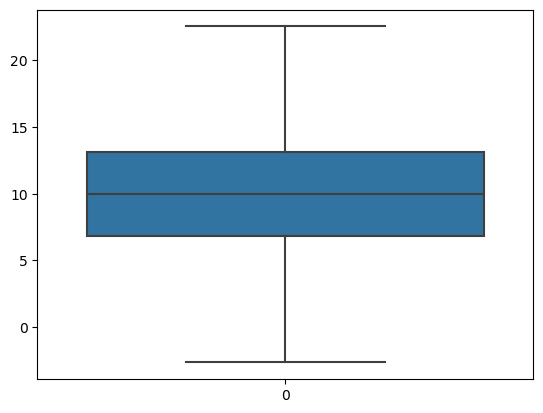

In [47]:
sns.boxplot(df1.study_hours)
plt.show()

# 2..

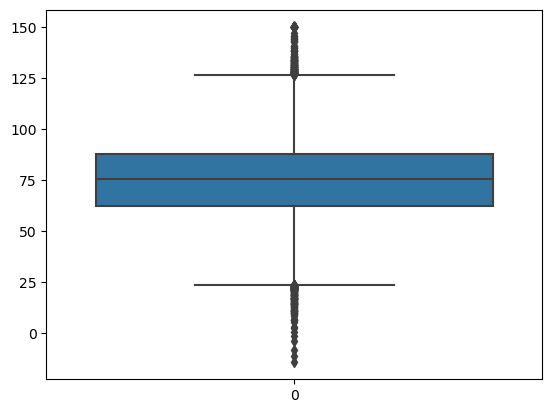

In [48]:
sns.boxplot(df.Attendance_Rate)
plt.show()

In [49]:
q1=df["Attendance_Rate"].quantile(0.25)
q3=df["Attendance_Rate"].quantile(0.75)

IQR=q3-q1

In [50]:
lb=q1-1.5*IQR
ub=q3+1.5*IQR

In [51]:
df.loc[(df["Attendance_Rate"] > ub) | (df["Attendance_Rate"] < lb)]

,study_hours,Attendance_Rate,Previous_Grades,Participation_in_Extracurricular_Activities,Parent_Education_Level,Passed
50,11.6,127.4,71.3,Yes,High School,Yes
77,8.5,128.0,55.7,Yes,Bachelor,Yes
154,11.5,17.2,63.7,Yes,Bachelor,No
791,11.0,131.5,55.0,No,Bachelor,No
912,10.0,21.3,68.0,No,Bachelor,Yes
...,...,...,...,...,...,...
39507,9.5,150.0,70.4,Yes,Associate,Yes
39552,12.6,128.6,80.5,No,Master,No
39689,14.6,150.0,88.4,No,Doctorate,No
39698,13.0,150.0,65.2,No,Bachelor,No


In [52]:
df1=df.loc[(df["Attendance_Rate"] < ub) & (df["Attendance_Rate"] > lb)]
print("before removing outliers:",len(df))
print("after removing outliers:",len(df1))
print("outliers:",len(df)-len(df1))

before removing outliers: 34306
after removing outliers: 33888
outliers: 418


In [53]:
df1=df.copy()
df1.loc[(df1["Attendance_Rate"]>ub), "Attendance_Rate"]=ub
df1.loc[(df1["Attendance_Rate"]<lb), "Attendance_Rate"]=lb

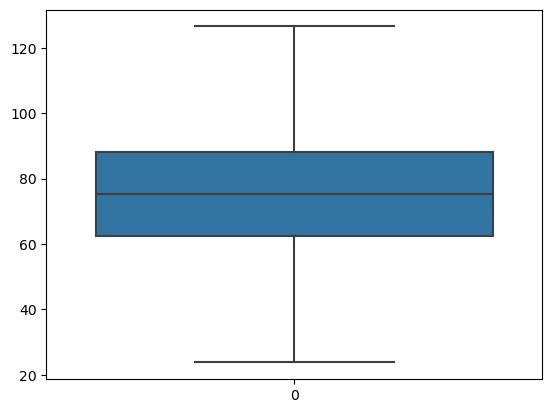

In [54]:
sns.boxplot(df1.Attendance_Rate)
plt.show()

# 3..

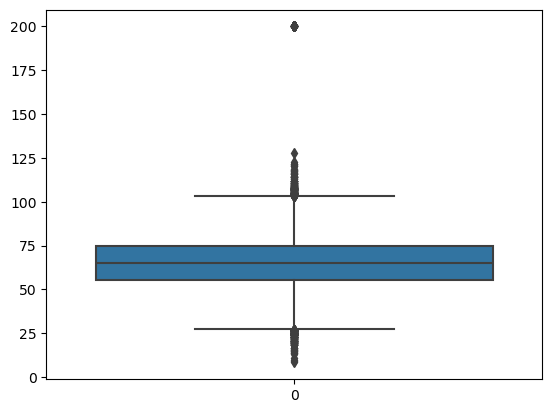

In [55]:
sns.boxplot(df1.Previous_Grades)
plt.show()

In [56]:
q1=df["Previous_Grades"].quantile(0.25)
q3=df["Previous_Grades"].quantile(0.75)

IQR=q3-q1

In [57]:
lb=q1-1.5*IQR
ub=q3+1.5*IQR

In [58]:
df.loc[(df["Previous_Grades"] > ub) | (df["Previous_Grades"] < lb)]

,study_hours,Attendance_Rate,Previous_Grades,Participation_in_Extracurricular_Activities,Parent_Education_Level,Passed
93,8.4,98.9,26.9,No,Doctorate,Yes
97,11.3,67.3,200.0,Yes,Master,Yes
262,-6.2,98.7,26.2,Yes,High School,Yes
318,11.6,100.1,200.0,Yes,Bachelor,Yes
379,6.0,86.1,26.4,Yes,Associate,No
...,...,...,...,...,...,...
39576,16.7,92.3,20.6,Yes,Associate,No
39678,9.3,71.3,18.8,No,Associate,No
39732,16.5,99.3,25.6,No,Associate,Yes
39797,14.6,90.0,107.2,No,Doctorate,No


In [59]:
df1=df.loc[(df["Previous_Grades"] < ub) & (df["Previous_Grades"] > lb)]
print("before removing outliers:",len(df))
print("after removing outliers:",len(df1))
print("outliers:",len(df)-len(df1))

before removing outliers: 34306
after removing outliers: 33838
outliers: 468


In [60]:
df1=df.copy()
df1.loc[(df1["Previous_Grades"]>ub), "Previous_Grades"]=ub
df1.loc[(df1["Previous_Grades"]<lb), "Previous_Grades"]=lb

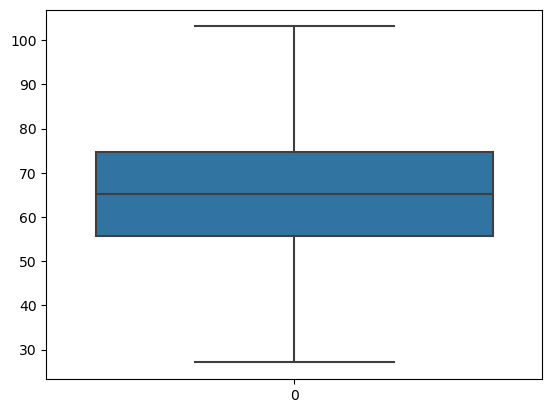

In [61]:
sns.boxplot(df1.Previous_Grades)
plt.show()

# Encoding to transform the data

In [62]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [63]:
df.select_dtypes(include="object").head(1)

,Participation_in_Extracurricular_Activities,Parent_Education_Level,Passed
0,Yes,Master,Yes


In [64]:
for i in df.select_dtypes(include="object"):
    df[i]=lb.fit_transform(df[i])

In [65]:
df.head()

,study_hours,Attendance_Rate,Previous_Grades,Participation_in_Extracurricular_Activities,Parent_Education_Level,Passed
0,12.5,75.3,75.0,1,4,1
1,9.3,95.3,60.6,0,3,0
2,13.2,75.3,64.0,0,0,0
3,17.6,76.8,62.4,1,1,0
4,8.8,89.3,72.7,0,4,0


# 4..

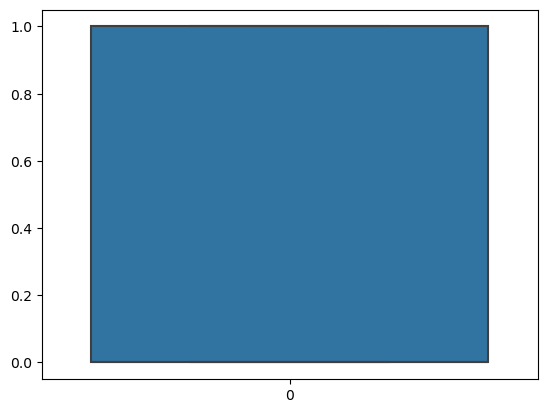

In [66]:
sns.boxplot(df.Passed)
plt.show()

# check correlation with target variable.

In [67]:
corr=df.corrwith(df.Passed).abs().sort_values(ascending=False)

In [146]:
corr

Passed                                         1.000000
Attendance_Rate                                0.010909
study_hours                                    0.009188
Previous_Grades                                0.004679
Parent_Education_Level                         0.003295
Participation_in_Extracurricular_Activities    0.002681
dtype: float64

# splitting the variable x and y into training and testing

In [68]:
x=df.drop("Passed",axis=1)
y=df.Passed

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [71]:
x_train.shape

(24014, 5)

In [72]:
x_test.shape

(10292, 5)

# Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=8,max_features=8,min_samples_leaf=6)

In [75]:
dt=dt.fit(x_train,y_train)

In [76]:
x_train

,study_hours,Attendance_Rate,Previous_Grades,Participation_in_Extracurricular_Activities,Parent_Education_Level
14091,8.6,68.4,74.3,1,4
35419,15.7,103.0,49.8,1,4
23676,6.3,95.8,97.9,1,0
25608,4.5,69.4,63.5,0,2
8556,8.2,78.8,98.0,1,3
...,...,...,...,...,...
19695,10.0,66.1,76.2,1,0
7284,16.2,110.7,71.4,0,1
13161,8.2,37.3,67.2,1,1
1005,12.0,59.7,64.2,1,0


In [77]:
y_train

14091    1
35419    1
23676    1
25608    0
8556     1
        ..
19695    0
7284     0
13161    0
1005     0
18439    0
Name: Passed, Length: 24014, dtype: int32

In [78]:
pred=dt.predict(x_test)

In [79]:
x_test

,study_hours,Attendance_Rate,Previous_Grades,Participation_in_Extracurricular_Activities,Parent_Education_Level
5499,18.0,90.6,47.7,1,3
32806,11.5,105.7,61.3,0,4
8926,3.2,79.3,84.6,0,3
6345,10.4,74.8,73.8,1,2
33133,13.3,101.6,71.4,0,4
...,...,...,...,...,...
7912,8.9,79.7,45.6,1,4
36371,9.9,65.4,77.0,1,0
35278,5.3,75.3,50.4,1,0
25804,6.9,62.4,87.6,0,2


In [80]:
y_test

5499     0
32806    1
8926     1
6345     1
33133    1
        ..
7912     0
36371    1
35278    1
25804    1
15305    1
Name: Passed, Length: 10292, dtype: int32

In [81]:
pred

array([0, 0, 1, ..., 1, 0, 0])

# Import Evaluation matrix for classification 

In [82]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [83]:
print(accuracy_score(y_test,pred))

0.5034006995724835


In [84]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.50      0.72      0.59      5143
           1       0.51      0.28      0.36      5149

    accuracy                           0.50     10292
   macro avg       0.50      0.50      0.48     10292
weighted avg       0.50      0.50      0.48     10292



# Build gridsearchcv model for better stability and accuracy of DecisiontreeClassifier

In [85]:
from sklearn.model_selection import  GridSearchCV
from sklearn import metrics

In [86]:
grid = {'max_depth': [5,6,7,8,9,10],
        'max_features': [5,6,7,8,9,10,11,12,13,14,15],
        'max_leaf_nodes': [3,4,5,6]}

In [87]:
DT_model_GS = GridSearchCV(DecisionTreeClassifier(), param_grid = grid, scoring = 'roc_auc', cv = 5, verbose = True)

In [88]:
DT_model_GS = DT_model_GS.fit(x_train,y_train)

Fitting 5 folds for each of 264 candidates, totalling 1320 fits


In [89]:
DT_model_GS.best_params_

{'max_depth': 5, 'max_features': 5, 'max_leaf_nodes': 3}

In [90]:
new_model=DecisionTreeClassifier(criterion="entropy",max_depth=5,max_features=5,max_leaf_nodes=4)

In [91]:
final_model=new_model.fit(x_train,y_train)

In [92]:
pred=final_model.predict(x_test)

In [93]:
print(metrics,classification_report(y_test,pred))

<module 'sklearn.metrics' from 'C:\\Users\\kmm23\\anaconda3\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'>               precision    recall  f1-score   support

           0       0.50      0.96      0.66      5143
           1       0.52      0.05      0.08      5149

    accuracy                           0.50     10292
   macro avg       0.51      0.50      0.37     10292
weighted avg       0.51      0.50      0.37     10292



In [94]:
from sklearn import tree

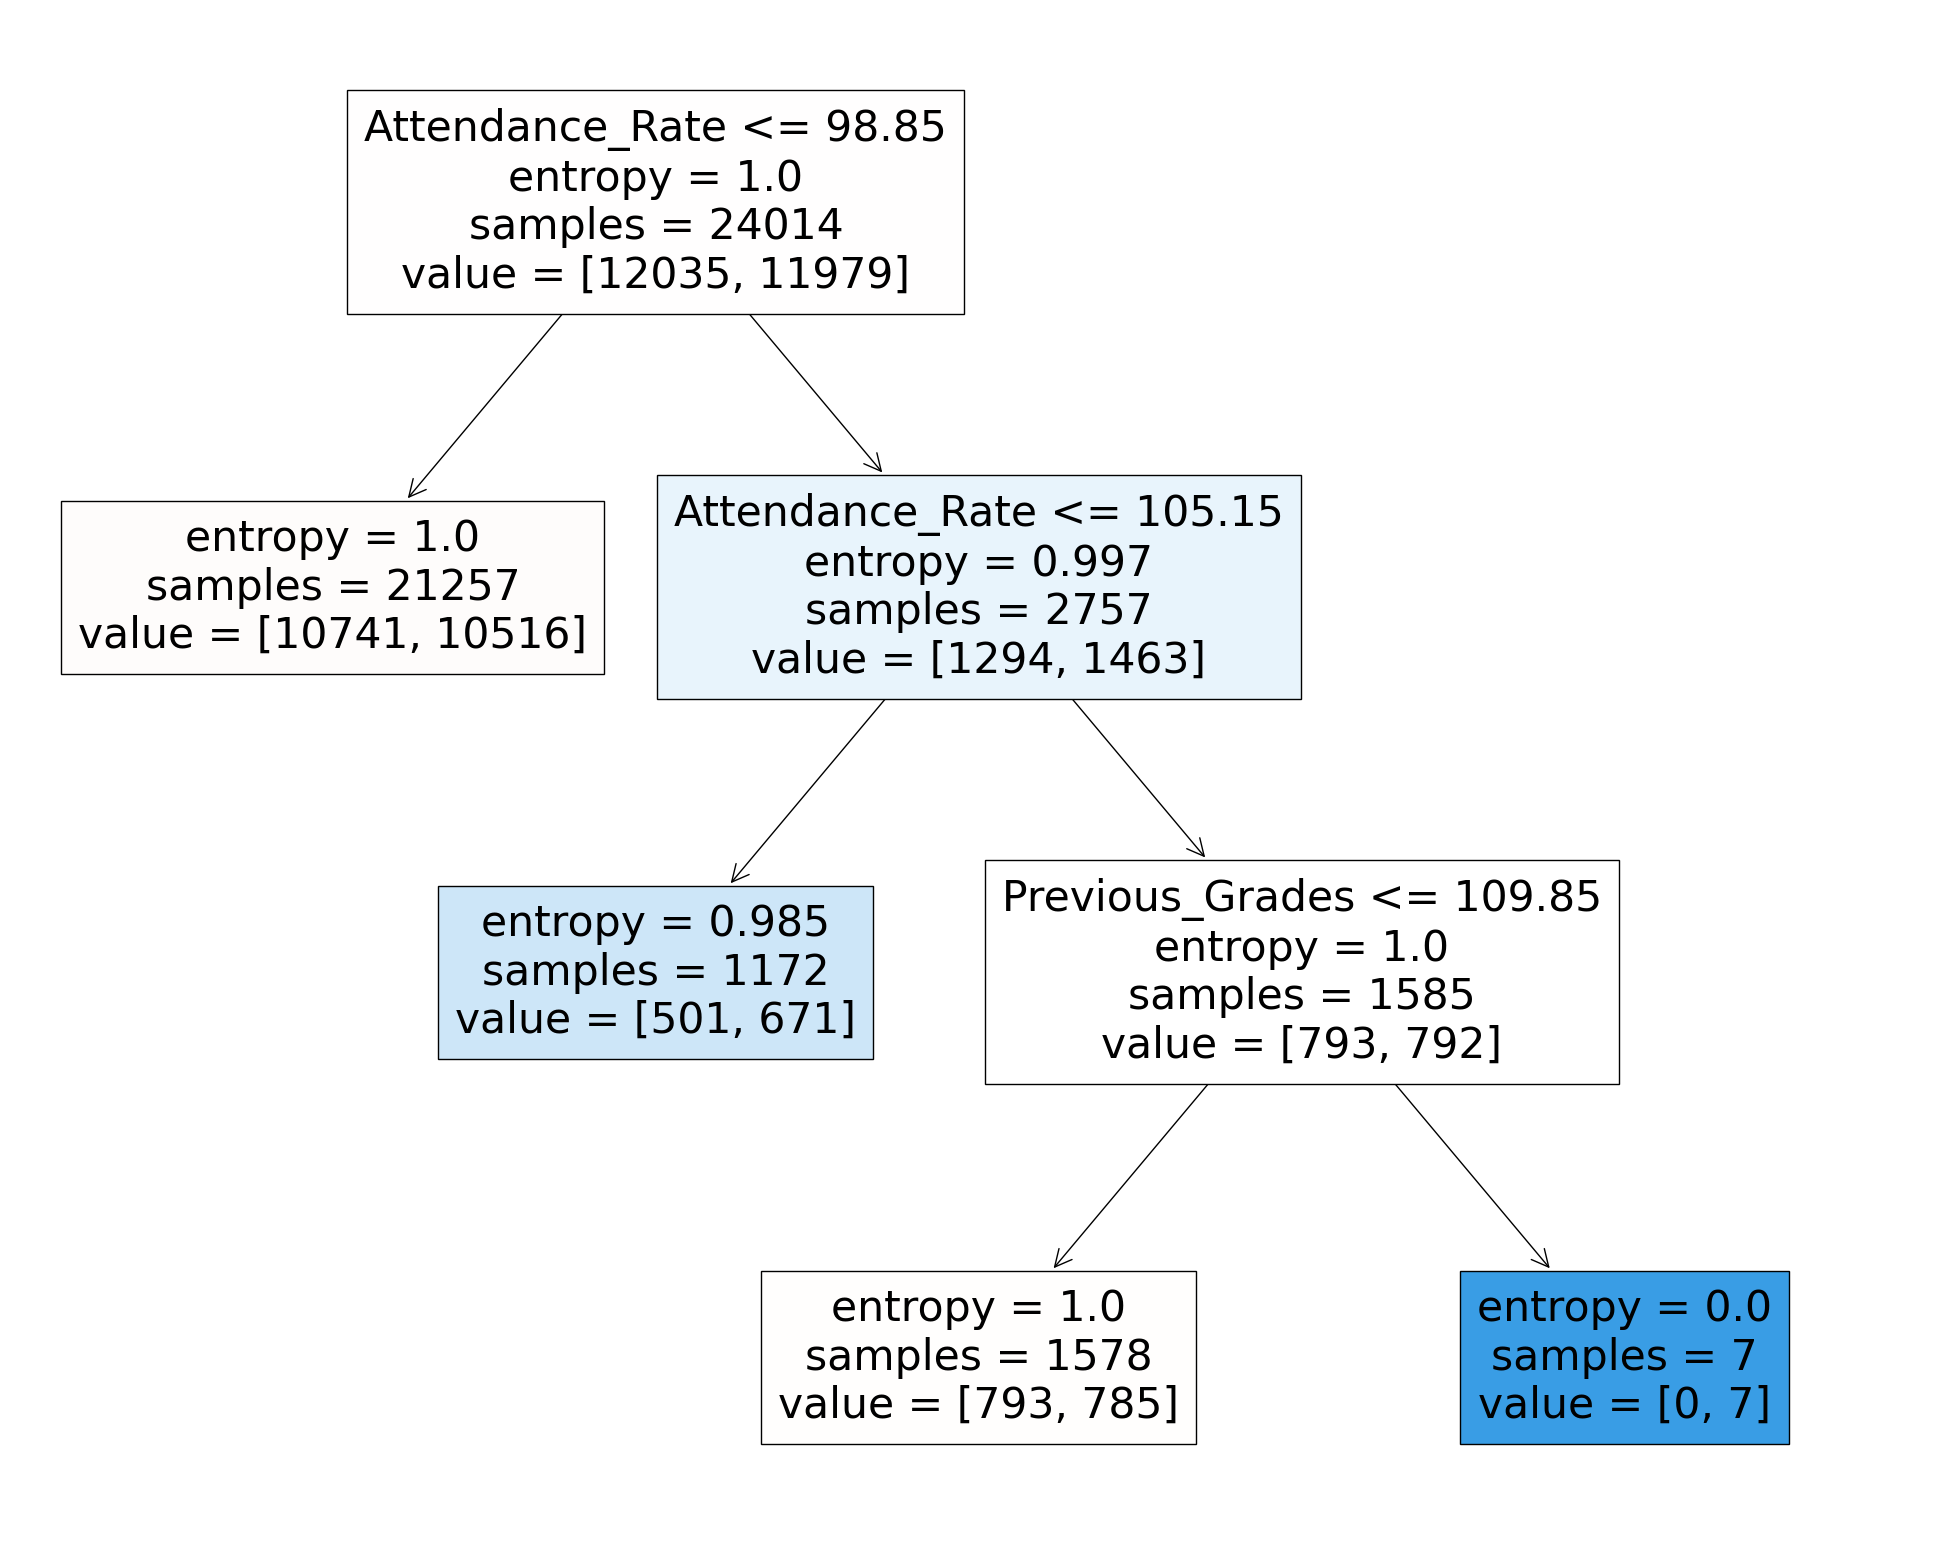

In [95]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(final_model, feature_names=x_train.columns,filled=True)

# splitting the data into training and testing for knn_model

In [96]:
x=df.drop("Passed",axis=1)
y=df.Passed

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [99]:
x_train

,study_hours,Attendance_Rate,Previous_Grades,Participation_in_Extracurricular_Activities,Parent_Education_Level
4961,4.9,82.5,50.7,0,3
21542,4.8,88.1,60.7,0,0
29512,7.2,113.6,69.9,1,2
24217,2.9,65.9,68.3,0,1
24781,10.0,100.3,41.7,1,1
...,...,...,...,...,...
19695,10.0,66.1,76.2,1,0
7284,16.2,110.7,71.4,0,1
13161,8.2,37.3,67.2,1,1
1005,12.0,59.7,64.2,1,0


# standardized the data at same scale

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
sd=StandardScaler()

In [102]:
sd=sd.fit(df)

In [103]:
scaled=sd.transform(df)

In [104]:
df_scaled=pd.DataFrame(scaled,columns=df.columns)

In [105]:
df_scaled

,study_hours,Attendance_Rate,Previous_Grades,Participation_in_Extracurricular_Activities,Parent_Education_Level,Passed
0,0.517475,0.001661,0.594437,1.000700,1.427844,1.001459
1,-0.134838,1.006296,-0.299207,-0.999301,0.718471,-0.998544
2,0.660168,0.001661,-0.088208,-0.999301,-1.409647,-0.998544
3,1.557099,0.077009,-0.187502,1.000700,-0.700275,-0.998544
4,-0.236762,0.704906,0.451702,-0.999301,1.427844,-0.998544
...,...,...,...,...,...,...
34301,1.149403,0.930949,-0.870147,1.000700,1.427844,-0.998544
34302,0.272857,-0.445401,-0.075796,-0.999301,0.009098,1.001459
34303,0.639784,-0.485587,-1.695526,-0.999301,-0.700275,-0.998544
34304,0.843631,-0.018432,-0.013737,1.000700,1.427844,-0.998544


In [106]:
x_test

,study_hours,Attendance_Rate,Previous_Grades,Participation_in_Extracurricular_Activities,Parent_Education_Level
5499,18.0,90.6,47.7,1,3
32806,11.5,105.7,61.3,0,4
8926,3.2,79.3,84.6,0,3
6345,10.4,74.8,73.8,1,2
33133,13.3,101.6,71.4,0,4
...,...,...,...,...,...
16921,13.4,56.2,66.8,0,0
35161,9.9,116.0,74.9,1,4
22186,10.0,65.9,60.3,0,4
21867,8.8,59.9,65.2,0,2


# KNN_classification model

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn=KNeighborsClassifier(n_neighbors=3,weights="uniform")

In [109]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [110]:
pred=knn.predict(x_test)

In [111]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [112]:
print(metrics,classification_report(y_test,pred))

<module 'sklearn.metrics' from 'C:\\Users\\kmm23\\anaconda3\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'>               precision    recall  f1-score   support

           0       0.50      0.49      0.50      3479
           1       0.49      0.50      0.49      3383

    accuracy                           0.49      6862
   macro avg       0.49      0.49      0.49      6862
weighted avg       0.50      0.49      0.49      6862



In [113]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [114]:
knn=KNeighborsClassifier(n_neighbors=2,weights="uniform")

In [115]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [116]:
pred=knn.predict(x_test)

In [117]:
pred

array([1, 1, 0, ..., 0, 0, 0])

In [118]:
y_test

5499     0
32806    1
8926     1
6345     1
33133    1
        ..
16921    0
35161    1
22186    0
21867    1
21278    0
Name: Passed, Length: 6862, dtype: int32

In [119]:
df0=pd.DataFrame({"Actual":y_test,"predicted":pred})

In [120]:
df0

,Actual,predicted
5499,0,1
32806,1,1
8926,1,0
6345,1,0
33133,1,0
...,...,...
16921,0,0
35161,1,1
22186,0,0
21867,1,0


In [121]:
knn.score(x_test,y_test)

0.49897988924511805

In [122]:
print(metrics,classification_report(y_test,pred))

<module 'sklearn.metrics' from 'C:\\Users\\kmm23\\anaconda3\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'>               precision    recall  f1-score   support

           0       0.50      0.74      0.60      3479
           1       0.48      0.25      0.33      3383

    accuracy                           0.50      6862
   macro avg       0.49      0.50      0.46      6862
weighted avg       0.49      0.50      0.47      6862



# import gridsearchcv to get better accuracy of Knn-model

In [123]:
from sklearn.model_selection import  GridSearchCV
from sklearn import metrics

In [124]:
grid = {'n_neighbors':[3,5,7,9,11,13,15,17,18,19,20], 'weights' : ['uniform','distance'] }

In [125]:
knn_model_Gs = GridSearchCV(KNeighborsClassifier(), param_grid = grid, scoring = 'roc_auc', cv = 9, verbose = True)

In [126]:
knn_model=knn_model_Gs.fit(x_train,y_train)

Fitting 9 folds for each of 22 candidates, totalling 198 fits


In [127]:
knn_model.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [128]:
knn_model.best_score_

0.505260869241456

In [129]:
new_model=KNeighborsClassifier(n_neighbors=7,weights="uniform")

In [130]:
final_knn_model=new_model.fit(x_train,y_train)

In [131]:
pred=final_knn_model.predict(x_train)

In [132]:
print(metrics,classification_report(y_train,pred))

<module 'sklearn.metrics' from 'C:\\Users\\kmm23\\anaconda3\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'>               precision    recall  f1-score   support

           0       0.66      0.66      0.66     13699
           1       0.66      0.66      0.66     13745

    accuracy                           0.66     27444
   macro avg       0.66      0.66      0.66     27444
weighted avg       0.66      0.66      0.66     27444



In [133]:
pred=final_knn_model.predict(x_test)

In [134]:
pred

array([1, 1, 0, ..., 0, 1, 0])

In [135]:
y_test

5499     0
32806    1
8926     1
6345     1
33133    1
        ..
16921    0
35161    1
22186    0
21867    1
21278    0
Name: Passed, Length: 6862, dtype: int32

In [136]:
df1=pd.DataFrame({"Actual":y_test,"predicted":pred})

In [137]:
df1

,Actual,predicted
5499,0,1
32806,1,1
8926,1,0
6345,1,0
33133,1,0
...,...,...
16921,0,0
35161,1,1
22186,0,0
21867,1,1


In [138]:
print(metrics,classification_report(y_test,pred))

<module 'sklearn.metrics' from 'C:\\Users\\kmm23\\anaconda3\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'>               precision    recall  f1-score   support

           0       0.50      0.49      0.50      3479
           1       0.49      0.50      0.49      3383

    accuracy                           0.49      6862
   macro avg       0.49      0.49      0.49      6862
weighted avg       0.49      0.49      0.49      6862



In [139]:
pred1=final_knn_model.predict(np.array([[0,1,1,0,1,]]))[0]

In [140]:
pred1

0

# Data Visualization

In [141]:
df.head(3)

,study_hours,Attendance_Rate,Previous_Grades,Participation_in_Extracurricular_Activities,Parent_Education_Level,Passed
0,12.5,75.3,75.0,1,4,1
1,9.3,95.3,60.6,0,3,0
2,13.2,75.3,64.0,0,0,0


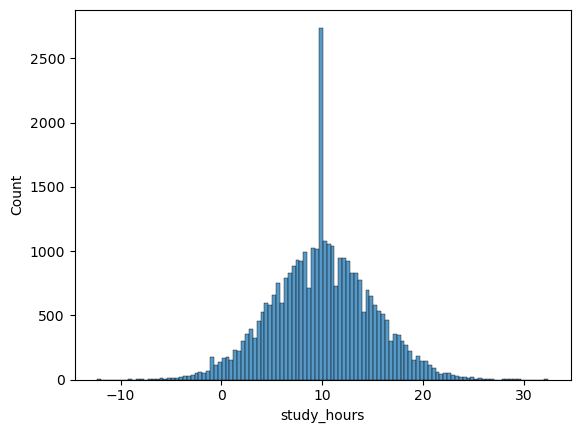

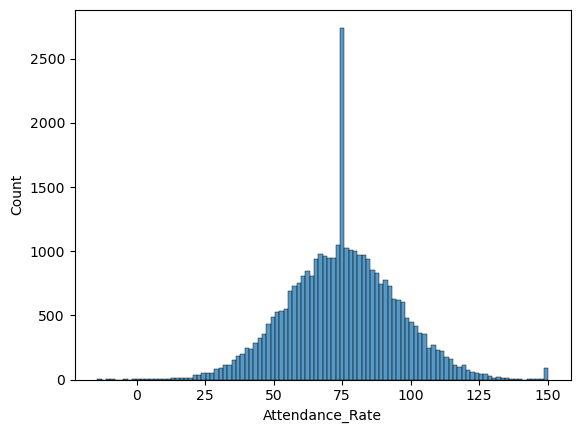

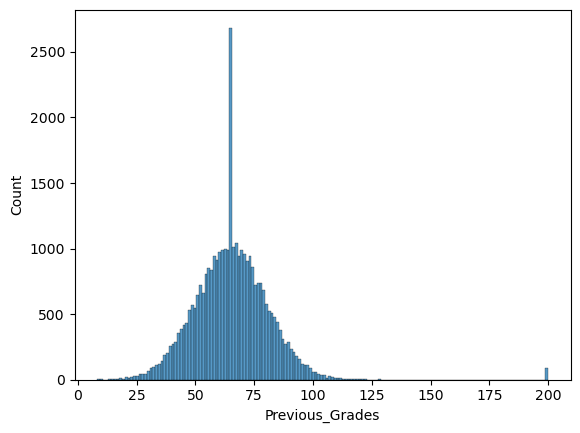

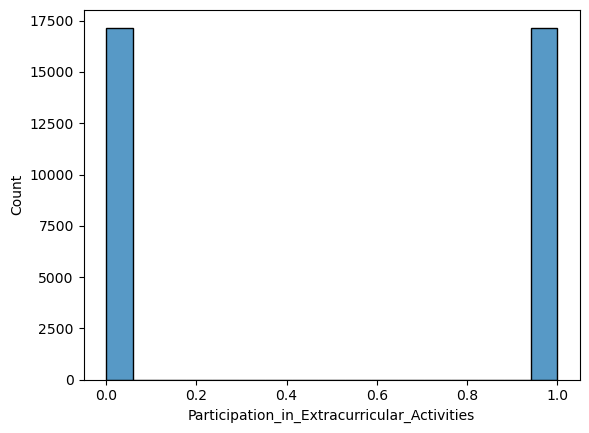

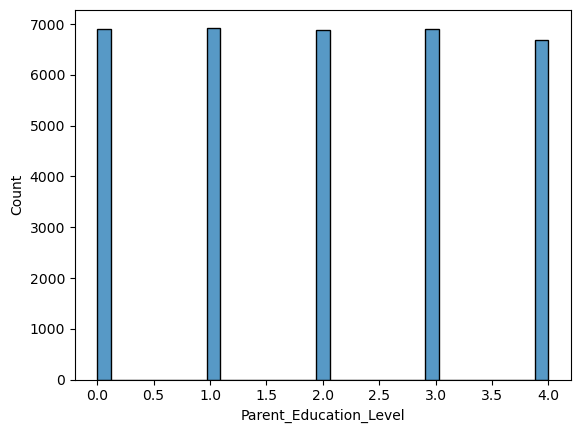

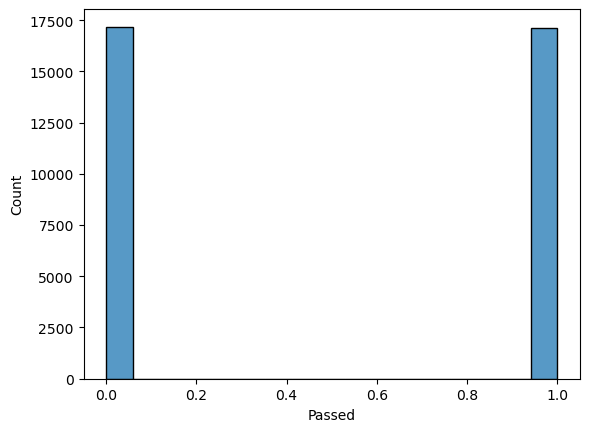

In [142]:
for col_type in df.select_dtypes(include = "number").columns:
    sns.histplot(data = df, x = col_type)
    plt.show()

<Axes: ylabel='Density'>

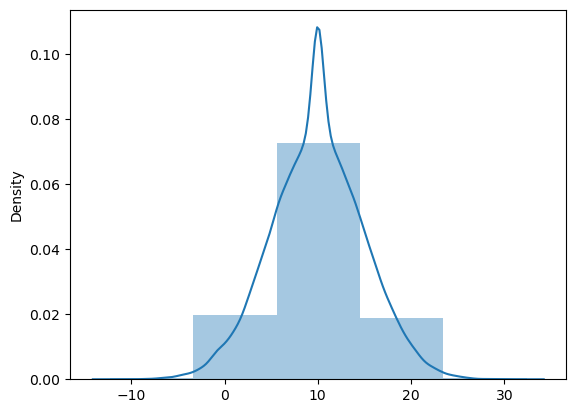

In [143]:
sns.distplot(x=df.study_hours,bins=5)

<Axes: >

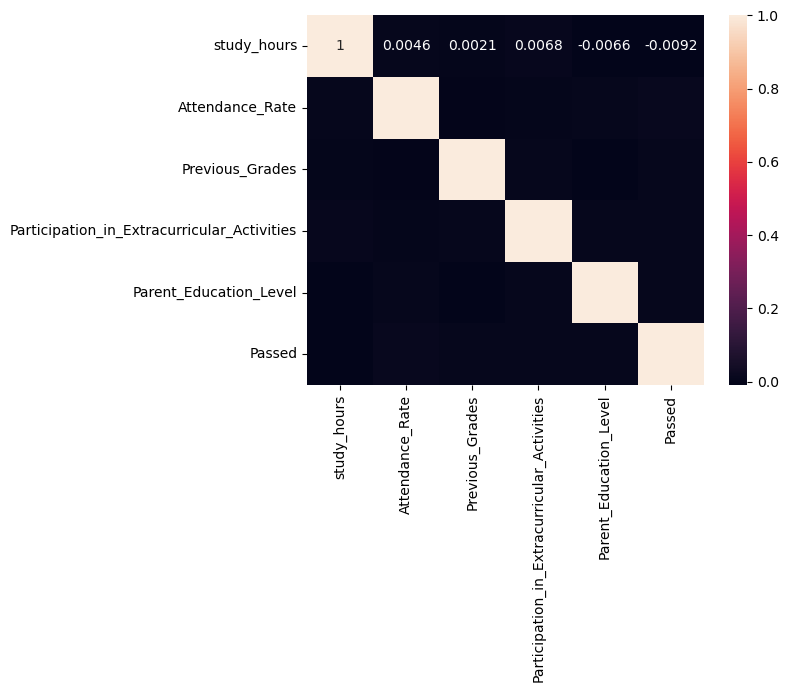

In [144]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='Passed', ylabel='study_hours'>

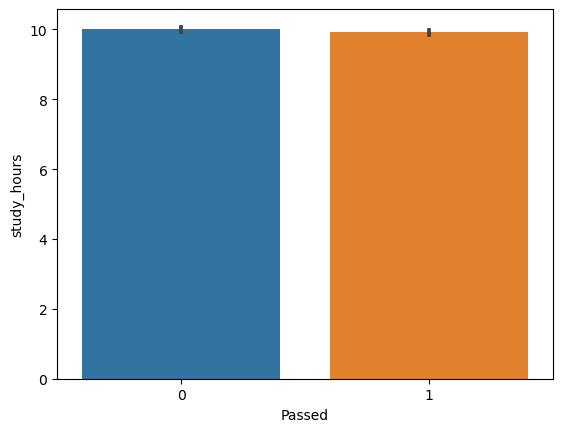

In [145]:
sns.barplot(x="Passed",y="study_hours",data=df)